 # 洗錢 - Clustering Model
- 筆記: https://www.notion.so/jayschsu/c6a6219dd004469bbbfbecfb6d9883f3

In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
import os
import pandas as pd
import numpy as np 
import seaborn as sns
from log import init_logging
from data import Data
from model_clustering import ClusterModel
from model_regression import RegressionModel
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 3)

### Data
- Raw Data
    - custinfo_df, ccba_df, cdtx_df, dp_df, remit_df, 
    - tr_alertX_df, tr_sarY_df, public_alertX_df
    - custinfo_valid
- Featuring (Date)
    - cdtxDate_df, dpDate_df, remitDate_df
- Featuring (Accumulate)
    - cdtx_feature, dp_feature, remit_feature
- Featuring (Intergrated)
    - data_df
    - Feature_Dict
- Sar Flag
    - moneyLundry dataset (sar_flag==1, in alert_date)
    - falseAlarm dataset (sar_flag==0, in alert_date)
    - public dataset (sar_flag==2, in alert_date)

In [2]:
dataset = Data()
dataset.data_df['sar_flag'].value_counts().to_frame()

2022-12-08 17:55:28,111 INFO: func:init_data: 3.22 sec (utils.py:16)
2022-12-08 17:55:28,112 INFO: custinfo_preprocess (data.py:54)
invalid_data_qty: 2
2022-12-08 17:55:28,229 INFO: func:custinfo_preprocess: 0.12 sec (utils.py:16)
2022-12-08 17:55:28,230 INFO: featuring_alertDate (data.py:83)
2022-12-08 17:55:58,104 INFO: func:featuring_alertDate: 29.87 sec (utils.py:16)
2022-12-08 17:55:58,104 INFO: featuring_accumulate (data.py:149)
2022-12-08 17:56:49,536 INFO: func:featuring_accumulate: 51.43 sec (utils.py:16)
2022-12-08 17:56:49,538 INFO: featuring_integrate (data.py:164)
2022-12-08 17:57:13,438 INFO: func:featuring_integrate: 23.90 sec (utils.py:16)


,sar_flag
0.0,23451
2.0,1770
1.0,233


## Clustering Model

2022-12-08 17:58:41,796 INFO: val precision: 0.015384615384615385 (model_clustering.py:72)


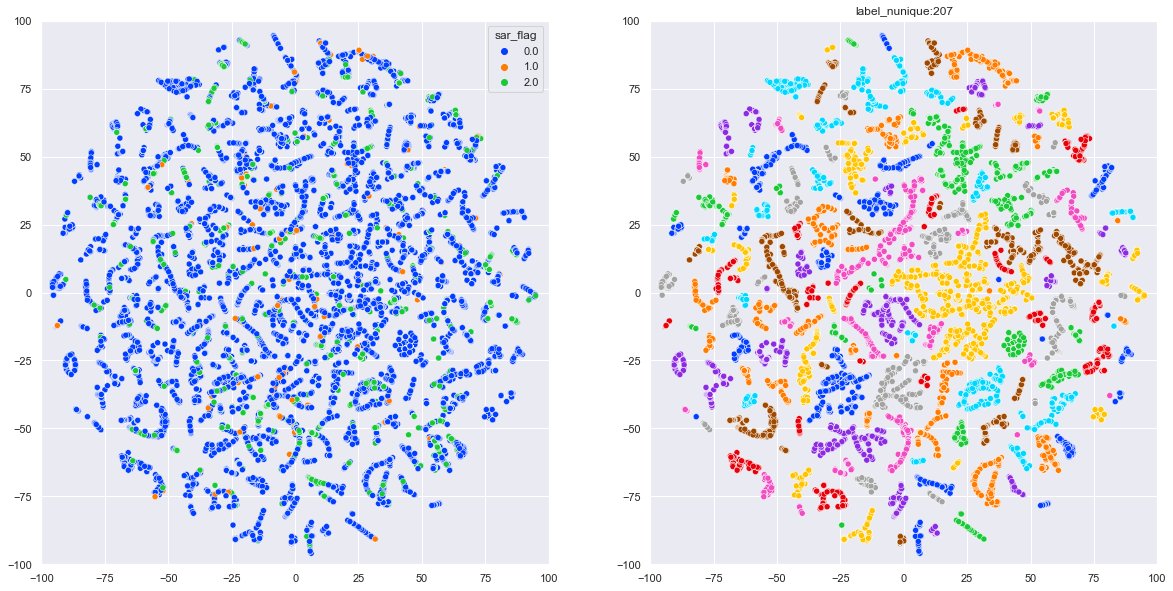

In [3]:
model_cluster = ClusterModel(dataset)
data_ts = model_cluster.inference()
model_cluster.plot_clustering(data_ts)



## Autogluon Model

In [ ]:
data_ts['sar_prob_clustering'] = data_ts['sar_prob']
dataset.data_df = data_ts

In [ ]:
model_reg = RegressionModel(dataset)
data_ts = model_reg.inference()

***

### PLOT

In [ ]:
if False:
    idx=np.where(clustering.labels_==18)[0]
    palette = sns.color_palette("bright", len(np.unique(y_tr[idx])))
    sns.scatterplot(x_embedded[idx,0], x_embedded[idx,1], hue=y_tr[idx], palette=palette)
    sar_qty = sum(y_tr[idx]==1)
    plt.title(f'sar_qty:{sar_qty}')
    plt.xlim(-100,100)
    plt.ylim(-100,100)

In [ ]:
if False:
    CLUSTER = 745
    y_val = data['sar_val']
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    val_idx = np.where((data['data_type']!='ts') &  (data['cluster_label']==CLUSTER))[0]
    palette = sns.color_palette("bright", len(np.unique(y_val[val_idx])))
    sns.scatterplot(x_embedded[val_idx,0], x_embedded[val_idx,1], hue=y_val[val_idx], palette=palette)
    sar_qty = sum(y_val[val_idx]==1)
    plt.title(f'sar_qty:{sar_qty}')
    plt.xlim(-100,100)
    plt.ylim(-100,100)

    plt.subplot(122)
    ts_idx=np.where(clustering.labels_==CLUSTER)[0]
    palette = sns.color_palette("bright", len(np.unique(y_tr[ts_idx])))
    sns.scatterplot(x_embedded[ts_idx,0], x_embedded[ts_idx,1], hue=y_tr[ts_idx], palette=palette)
    sar_qty = sum(y_tr[ts_idx]==1)
    plt.title(f'sar_qty:{sar_qty}')
    plt.xlim(-100,100)
    plt.ylim(-100,100)